In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


auto=np.genfromtxt('auto_new.csv',delimiter=',')
auto.shape

#Define sampling rate N
N = 20000

auto1=auto[1:,1:N]
auto1 = auto1.T



from sklearn.decomposition import PCA
X=np.array(auto1)
pca=PCA(n_components=2)
pca.fit(X)
y = pca.fit_transform(X)
pc_auto = pca.components_
pc_auto.shape



auto1_mean = np.mean(auto1, axis = 1)  #Mean-center the data

data_mc = auto1 - np.transpose(np.tile(np.transpose(auto1_mean),(auto1.shape[1],1))) #Substract mean of each entry from the matrix to get mean-centered data 
data_mc_cov = np.cov(data_mc)

data_mc_eigvalue,data_mc_eigvector = np.linalg.eig(data_mc_cov) #Calculate the covariance matrix of the mean-centered data
data_mc_eigvalue_real = data_mc_eigvalue.real
data_mc_eigvector_real = data_mc_eigvector.real  #Omit the imaginary part of the eigenvalue/eigenvector




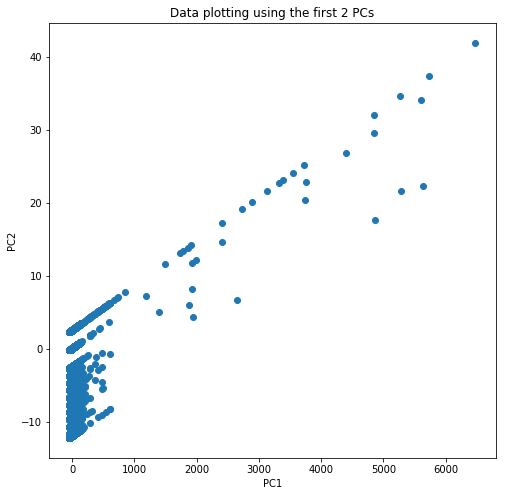

In [50]:

#Select the top eigenvectors as PCs, in this case, first 2 PCs

top_eigvec = data_mc_eigvector.real[0:2] #select top eigenvectors 
data_new = np.dot(data_mc.transpose(),top_eigvec.transpose())  #project the original data points to the new low-dimension space

#plot the data projected to the new eigenvector space. 
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(111)

ax.scatter(data_new[:, 0], data_new[:, 1], cmap= "coolwarm" ,marker='o')
plt.title("Data plotting using the first 2 PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
 

In [52]:
print(pca.explained_variance_ratio_) 

[0.99544851 0.00395179]


In [51]:
top_eigvec

array([[ 4.60082198e-03,  9.45342016e-01,  3.25941369e-01,
        -6.38583746e-03, -5.36188010e-03],
       [ 5.68574840e-04,  5.88935490e-03,  1.97712499e-03,
         9.99489101e-01, -3.13467598e-02]])

In first PC, gearbox and powerPS contribtes the most (positively). 
In second PC, mileage and Repaired_Damage contribute the most. 
However, PC1 accounts for >99% of the total variance. PC2 could be ignored. 


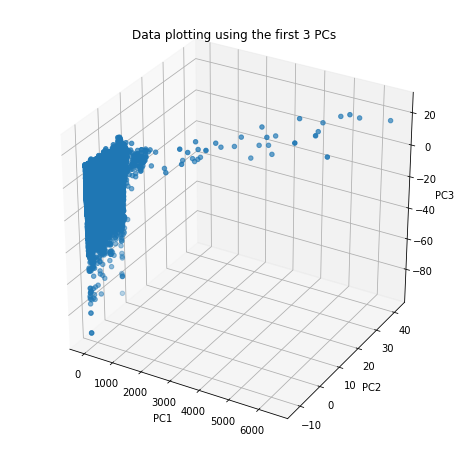

In [41]:

#Select the top eigenvectors as PCs, in this case, first 3 PCs

top_eigvec = data_mc_eigvector.real[0:3] #select top eigenvectors 
data_new = np.dot(data_mc.transpose(),top_eigvec.transpose())  #project the original data points to the new low-dimension space

#plot the data projected to the new eigenvector space. 
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(111,projection='3d')

ax.scatter(data_new[:, 0], data_new[:, 1], data_new[:, 2],cmap= "coolwarm" ,marker='o')
plt.title("Data plotting using the first 3 PCs")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
 

In [62]:
labels   = [] 

price = auto[:,0]
for i in range(N):
    if price[i]<2500:
        labels.append('A')
    if 2500<=price[i]<5000:
        labels.append('B')
    if 5000<=price[i]<10000:
        labels.append('C')
    if price[i]>=10000:
        labels.append('D')
          
# Label to color dict (manual)
label_color_dict = {'A':'red','B':'yellow','C':'blue','D':'green'}

# Color vector creation
cvec = [label_color_dict[label] for label in labels]

In [60]:
c

NameError: name 'c' is not defined

In [41]:
print(pca.singular_values_)  

[20356712.55674085    74203.43235221]


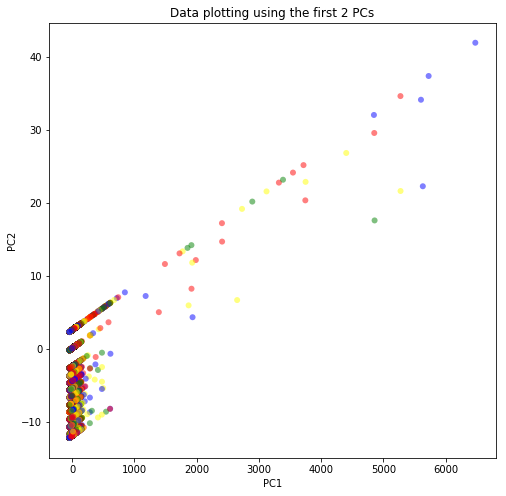

In [63]:
#Select the top eigenvectors as PCs, in this case, first 2 PCs

top_eigvec = data_mc_eigvector.real[0:2] #select top eigenvectors 
data_new = np.dot(data_mc.transpose(),top_eigvec.transpose())  #project the original data points to the new low-dimension space

#plot the data projected to the new eigenvector space. 
plt.figure(figsize=(8,8))  
plt.scatter(data_new[:, 0], data_new[:, 1], c=cvec, edgecolor='', alpha=0.5)


plt.title("Data plotting using the first 2 PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
 

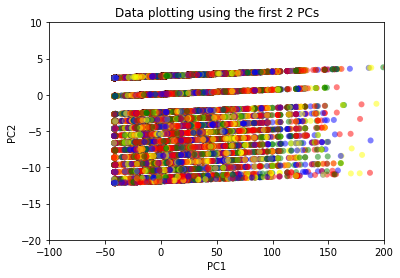

In [65]:

plt.scatter(data_new[:, 0], data_new[:, 1], c=cvec, edgecolor='', alpha=0.5)


plt.title("Data plotting using the first 2 PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(xmax=200)  
plt.xlim(xmin=-100)
plt.ylim(ymax=10)  
plt.ylim(ymin=-20)
plt.show()